## Installing libraries and Importing Files

In [106]:
import pandas as pd
from google.colab import files

In [107]:
uploaded = files.upload()

Saving hotel_reviews.csv to hotel_reviews (2).csv


In [108]:
data = pd.read_csv("hotel_reviews.csv")

## Looking at the various aspects of the data

In [109]:
data.head(5)

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,900.00%,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended.."
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,900.00%,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,900.00%,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,900.00%,"The location and the hotel itself is great. Next time I will stay here. Nice rooms with comfortable beds. good attitude of staff, they are helpful and explain you everything you ask them."
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,900.00%,"Friendly and smiling staffs.. The reception staff are so excellent and ready to help me any time, location is fantastic near all the attractions, room was big and comfortable.."


In [110]:
data.tail(5)

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
6996,6996,FabHotel F9 NSP,"North Delhi, New Delhi",Aug-23,I'd like to thank Manager.,1000.00%,"The room was good, comfortable and aesthetic \nthe hotel good location easy find Location is on walking distance from NSP metro station. Overall experience was good. \nEverything was all good. AC room service was all good. \nI'd like to thank Manager."
6997,6997,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,Superb,900.00%,good hotel
6998,6998,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,fabulous,1000.00%,good experience for me about hotel \nvery good staff and well done \nfood quality is fabulous \nnice location good view and room was perfect
6999,6999,FabHotel F9 NSP,"North Delhi, New Delhi",Jun-23,well done,1000.00%,well done
7000,7000,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,Bad,200.00%,Nothing


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6994 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB


In [112]:
# How many rows and columns
data.shape

(7001, 7)

In [113]:
# vizualise data
data.describe()

,Index,Rating(Out of 10)
count,700100.00%,700100.00%
mean,350000.00%,703.10%
std,202115.89%,288.28%
min,0.00%,100.00%
25%,175000.00%,600.00%
50%,350000.00%,800.00%
75%,525000.00%,900.00%
max,700000.00%,1000.00%


In [114]:
data.columns

Index(['Index', 'Name', 'Area', 'Review_Date', 'Rating_attribute',
       'Rating(Out of 10)', 'Review_Text'],
      dtype='object')

In [115]:
data.dtypes

Index                  int64
Name                  object
Area                  object
Review_Date           object
Rating_attribute      object
Rating(Out of 10)    float64
Review_Text           object
dtype: object

## Cleaning the Data

In [116]:
# prompt: Check for missing values

data.isnull().sum()


Index                0
Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          7
dtype: int64

In [117]:
# prompt: how do I check data for duplicates

duplicates = data.duplicated().sum()
print(duplicates)


0


In [118]:
# Checking for missing values
missing_values = data.isnull().any(axis = 1)
print("rows with missing values: ")
print(missing_values)

rows with missing values: 
0       False
1       False
2       False
3       False
4       False
        ...  
6996    False
6997    False
6998    False
6999    False
7000    False
Length: 7001, dtype: bool


In [119]:
# Checking for duplicates
duplicates = data[data.duplicated()]
print("Duplicated rows: ")
print(duplicates)

Duplicated rows: 
Empty DataFrame
Columns: [Index, Name, Area, Review_Date, Rating_attribute, Rating(Out of 10), Review_Text]
Index: []


In [120]:
# prompt: I want to remove missing values and duplicates from data

# Drop rows with missing values
data = data.dropna()

# Remove duplicates
data = data.drop_duplicates()


In [121]:
# incase there are missing values or duplicates
# missing values
data.dropna(axis=0, inplace=True)

In [122]:
# duplicates
data.drop_duplicates(inplace=True)

## Finding Correlation Between Ratings & Sentiment

In [123]:
!pip install textblob
from textblob import TextBlob


In [124]:
import seaborn as sns

In [125]:
data.head(5)

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,900.00%,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended.."
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,900.00%,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,900.00%,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,900.00%,"The location and the hotel itself is great. Next time I will stay here. Nice rooms with comfortable beds. good attitude of staff, they are helpful and explain you everything you ask them."
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,900.00%,"Friendly and smiling staffs.. The reception staff are so excellent and ready to help me any time, location is fantastic near all the attractions, room was big and comfortable.."


### Performing Sentiment Analysis

In [126]:
# def sentiment_analysis(text):
#   analysis = TextBlob(str(text))
#   return analysis.sentiment.polarity
def sentiment_analysis(text):
  analysis = TextBlob(str(text))
  return analysis.sentiment.polarity

In [127]:
# Calculate sentiment scores
data["Sentiment"] = data["Review_Text"].apply(sentiment_analysis)

# Round the sentiment scores
data["Sentiment"] = data["Sentiment"].round(2)  # Round to 2 decimal places

In [128]:
print("Dataframe with sentiment column:")
print(data.head())

Dataframe with sentiment column:
   Index             Name                  Area Review_Date  \
0      0  Hotel The Pearl  Paharganj, New Delhi      Jul-23   
1      1  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
2      2  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
3      3  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
4      4  Hotel The Pearl  Paharganj, New Delhi      Aug-23   

                            Rating_attribute  Rating(Out of 10)  \
0                 Best budget friendly hotel            900.00%   
1                              Amazing place            900.00%   
2               Overall good stay. Economic.            900.00%   
3                                     Lovely            900.00%   
4  Great hotel Great staff and great staying            900.00%   

                                                                                                                                                                                         

### Calculating the Correlation

In [129]:
corr_coef = data["Rating(Out of 10)"].corr(data["Sentiment"])

if corr_coef > 0:
    sentiment = "Positive"
elif corr_coef < 0:
    sentiment = "Negative"
else:
    sentiment = "Neutral"


In [130]:
print(f"\nCorrelation Coefficient between Rating & Sentiment is {sentiment}")




Correlation Coefficient between Rating & Sentiment is Positive


### Visualisation of Results

In [131]:
import matplotlib.pyplot as plt
import numpy as np


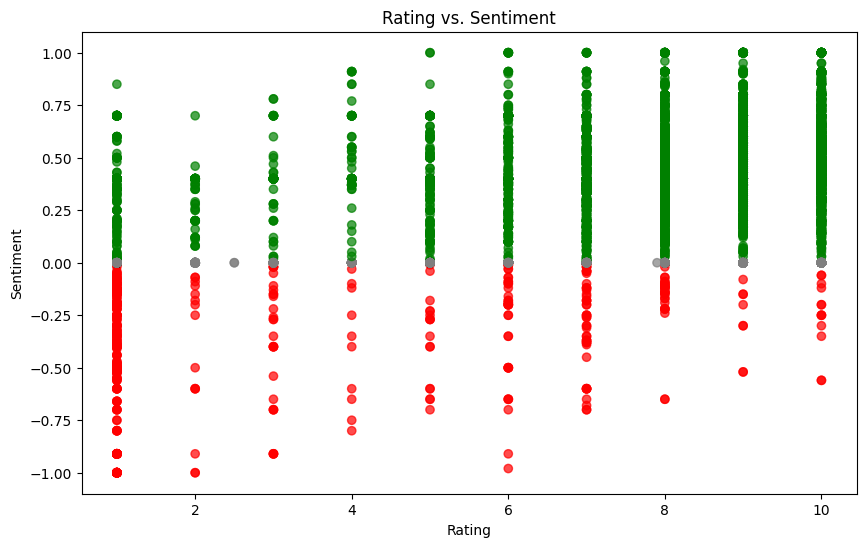

In [132]:
plt.figure(figsize=(10, 6))
colors = data["Sentiment"].apply(lambda x: 'red' if x < 0 else 'gray' if x == 0 else 'green')
plt.scatter(data["Rating(Out of 10)"], data["Sentiment"], c=colors, alpha=0.7)
plt.xlabel("Rating")
plt.ylabel("Sentiment")
plt.title("Rating vs. Sentiment")
plt.show()

## Keywords Analysis for Pos/Neg Reviews

### Installing library

In [133]:
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize

In [134]:
data.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,Sentiment
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,900.00%,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended..",48.00%
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,900.00%,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..,65.00%
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,900.00%,"Location, Indian food.",0.00%
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,900.00%,"The location and the hotel itself is great. Next time I will stay here. Nice rooms with comfortable beds. good attitude of staff, they are helpful and explain you everything you ask them.",50.00%
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,900.00%,"Friendly and smiling staffs.. The reception staff are so excellent and ready to help me any time, location is fantastic near all the attractions, room was big and comfortable..",35.00%


In [135]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [136]:
def analyse_sentiment(text):
  analysis = TextBlob(str(text))
  return "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

In [137]:
data["Sentiment"] = data["Rating_attribute"].apply(analyse_sentiment)

In [138]:
positive_reviews = ''.join(data[data["Sentiment"] == "Positive"]["Rating_attribute"])
negative_reviews = ''.join(data[data["Sentiment"] == "Negative"]["Rating_attribute"])


In [139]:
stopwords_set = set(stopwords.words('english'))

In [140]:
positive_tokens = word_tokenize(positive_reviews)
negative_tokens = word_tokenize(negative_reviews)


In [141]:
positive_tokens = [word.lower() for word in positive_tokens if word.isalpha() and word.lower() not in stopwords_set]
negative_tokens = [word.lower() for word in negative_tokens if word.isalpha() and word.lower() not in stopwords_set]

In [142]:
top_positive_words = Counter(positive_tokens).most_common(10)
top_negative_words = Counter(negative_tokens).most_common(10)

In [143]:
print("Top Positive Words:")
for word, count in top_positive_words:
    print(f"{word}: {count}")

Top Positive Words:
stay: 331
good: 311
hotel: 199
goodvery: 192
staff: 146
location: 123
place: 111
great: 104
value: 89
nice: 88


In [144]:
print("\nTop Negative Words:")
for word, count in top_negative_words:
    print(f"{word}: {count}")


Top Negative Words:
bad: 43
experience: 35
hotel: 34
stay: 31
worst: 25
room: 22
worth: 17
poor: 15
poorvery: 13
dirty: 13


In [145]:
print("Top 10 keywords that are frequently used in positive reviews")
print(top_positive_words)

Top 10 keywords that are frequently used in positive reviews
[('stay', 331), ('good', 311), ('hotel', 199), ('goodvery', 192), ('staff', 146), ('location', 123), ('place', 111), ('great', 104), ('value', 89), ('nice', 88)]


## Analzing Emotional Aspects of Customer Reviews

In [146]:
!pip install NRCLex
from nrclex import NRCLex


In [147]:
data.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,Sentiment
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,900.00%,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended..",Positive
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,900.00%,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..,Positive
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,900.00%,"Location, Indian food.",Positive
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,900.00%,"The location and the hotel itself is great. Next time I will stay here. Nice rooms with comfortable beds. good attitude of staff, they are helpful and explain you everything you ask them.",Positive
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,900.00%,"Friendly and smiling staffs.. The reception staff are so excellent and ready to help me any time, location is fantastic near all the attractions, room was big and comfortable..",Positive


In [148]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [149]:
#Filling not numbered values with empty strings
data['Review_Text'] = data['Review_Text'].fillna('')

In [150]:
# Apply emotional analysis to the review
data['Emotions'] = data['Review_Text'].apply(lambda text: [(emotion, score * 100)
for emotion, score in NRCLex(text).affect_frequencies.items()])

In [151]:
# Displaying the maximum column
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2%}'.format
print(data[['Review_Text', 'Emotions']].head(3))

                                                                                                                                                                                                                                 Review_Text  \
0  Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended..   
1                                                                                                          Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..   
2                                                                                                                                                                                                                     Location, Indian food.   

                                       

In [152]:
my_review = "This hotel was indeed a very good idea. It exceeded my expectations. The staff were very good"
emotion_analysis = NRCLex(my_review).top_emotions
print(f"\n Emotion analysis for my review:\n {emotion_analysis}")


 Emotion analysis for my review:
 [('trust', 0.2), ('surprise', 0.2), ('positive', 0.2), ('joy', 0.2), ('anticipation', 0.2)]


## Perfoming Sentiment Analysis for each Hotel




In [153]:
# Create an empty list for unique hotels and their sentiments
hotel_sentiments = []

In [154]:
# iterate each unique hotel
for hotel in data["Name"].unique():
  # Filter the data for the current hotel
  hotel_data = data[data["Name"] == hotel]
  # get the average sentiment value of each hotel
  sentiments = []
  for review_text in hotel_data["Review_Text"]:
    analysis = TextBlob(str(review_text))
    if analysis.sentiment.polarity > 0:
      sentiments.append("Positive")
    elif analysis.sentiment.polarity < 0:
      sentiments.append("Negative")
    else:
      sentiments.append("Neutral")

  if sentiments:
    overall_sentiment = max(set(sentiments), key=sentiments.count)
  else:
    overall_sentiment = "neutral"
  hotel_sentiments.append((hotel, overall_sentiment))

# hotel_sentiments_df = pd.concat([pd.DataFrame(item, index=[1]) for item in hotel_sentiments], ignore_index=False)
# print(hotel_sentiments_df)

hotel_sentiments_df = pd.DataFrame(hotel_sentiments, columns=["Hotel", "Overall Sentiment"])
print(hotel_sentiments_df)

                                                            Hotel  \
0                                                 Hotel The Pearl   
1                                            Hotel Grand Park Inn   
2                                  FabHotel White Klove Paharganj   
3                            Hotel Mannat international by Mannat   
4           Holiday Inn New Delhi Mayur Vihar Noida, an IHG Hotel   
..                                                            ...   
565  Hotel SM SUITS Near Delhi Airport-Unit BY Grand urban Luxury   
566                              OYO Flagship Hotel Olive Saffron   
567                                     Flagship Chaudhary Palace   
568                            Hotel Aman Continental - Paharganj   
569                                    Hotel Pablas International   

    Overall Sentiment  
0            Positive  
1            Positive  
2            Positive  
3            Positive  
4            Positive  
..                ...  
565